In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define dataset path (Upload your dataset and update the path)
dataset_path = "/content/drive/My Drive/xray_dataset_covid19"  # Update if needed
train_file = os.path.join(dataset_path, "train")
test_file = os.path.join(dataset_path, "test")

In [ ]:
# Image dimensions
img_size = (150, 150)  # Resize images
batch_size = 32

In [ ]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_file,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 148 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_file,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 40 images belonging to 2 classes.


In [ ]:
# Create CNN Model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')  # Binary Classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train Model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5264 - loss: 1.0072 - val_accuracy: 0.5000 - val_loss: 0.6990
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 996ms/step - accuracy: 0.5297 - loss: 0.6900 - val_accuracy: 0.9750 - val_loss: 0.6471
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6790 - loss: 0.6673 - val_accuracy: 0.9750 - val_loss: 0.5498
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 996ms/step - accuracy: 0.7384 - loss: 0.6118 - val_accuracy: 0.9250 - val_loss: 0.3737
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6532 - loss: 0.5670 - val_accuracy: 0.7250 - val_loss: 0.4192
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 972ms/step - accuracy: 0.6803 - loss: 0.5493 - val_accuracy: 0.9250 - val_loss: 0.2602
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7061 - loss: 0.5273 - val_accuracy: 0.9750 - val_loss: 0.2012
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8345 - loss: 0.4721 - val_accuracy: 0.9750 - val_loss: 0.2243
Epoch 

In [ ]:
# Evaluate Model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.9458 - loss: 0.2360
Test Accuracy: 0.95


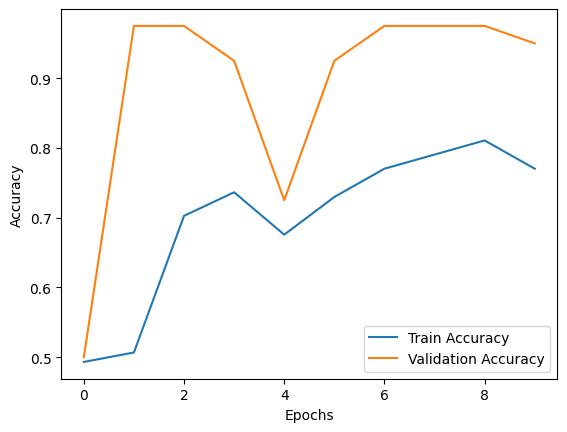

In [ ]:
# Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Create MobileNetV2 Model

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Load Pretrained Model (without top layers)
base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

<ipython-input-20-04845ca57b8e>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


In [ ]:
# Freeze base model layers
base_model.trainable = False

In [ ]:
# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

In [ ]:
# Create Model
mobilenet_model = Model(inputs=base_model.input, outputs=output_layer)

# Compile Model
mobilenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train MobileNetV2 Model
history_mobilenet = mobilenet_model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.5526 - loss: 1.0137 - val_accuracy: 0.8750 - val_loss: 0.3664
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7680 - loss: 0.5174 - val_accuracy: 0.9000 - val_loss: 0.2853
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 897ms/step - accuracy: 0.8423 - loss: 0.3556 - val_accuracy: 0.8750 - val_loss: 0.2414
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8876 - loss: 0.2316 - val_accuracy: 0.9000 - val_loss: 0.2198
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8742 - loss: 0.3463 - val_accuracy: 0.9000 - val_loss: 0.2203
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 936ms/step - accuracy: 0.9310 - loss: 0.1982 - val_accuracy: 0.9000 - val_loss: 0.2272
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9284 - loss: 0.1777 - val_accuracy: 0.9000 - val_loss: 0.2398
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 906ms/step - accuracy: 0.9094 - loss: 0.1841 - val_accuracy: 0.9000 - val_loss: 0.2265
Epoch 

In [ ]:
# Evaluate MobileNetV2 Model
test_loss_mobilenet, test_acc_mobilenet = mobilenet_model.evaluate(test_generator)
print(f"MobileNetV2 Test Accuracy: {test_acc_mobilenet:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.8417 - loss: 0.2738
MobileNetV2 Test Accuracy: 0.82


In [ ]:
# Create ResNet50 Model

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Load Pretrained ResNet50 Model (without top layers)
base_model = ResNet50(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

In [ ]:
# Freeze base model layers (to use pretrained features)
base_model.trainable = False

In [ ]:
# Add Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert feature maps to a single vector
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)  # Binary classification

In [ ]:
# Create Model
resnet_model = Model(inputs=base_model.input, outputs=output_layer)

In [ ]:
# Compile Model
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train ResNet50 Model
history_resnet = resnet_model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.6095 - loss: 0.6892 - val_accuracy: 0.5000 - val_loss: 0.6842
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5084 - loss: 0.7569 - val_accuracy: 0.5000 - val_loss: 0.6785
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 973ms/step - accuracy: 0.4872 - loss: 0.7377 - val_accuracy: 0.5000 - val_loss: 0.6759
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4381 - loss: 0.7251 - val_accuracy: 0.6750 - val_loss: 0.6664
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 978ms/step - accuracy: 0.5360 - loss: 0.6932 - val_accuracy: 0.9000 - val_loss: 0.6600
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 982ms/step - accuracy: 0.5402 - loss: 0.6808 - val_accuracy: 0.5000 - val_loss: 0.6598
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5240 - loss: 0.7055 - val_accuracy: 0.5500 - val_loss: 0.6540
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 986ms/step - accuracy: 0.6171 - loss: 0.6717 - val_accuracy: 0.9000 - val_loss: 0.6447
Epo

In [ ]:
# Evaluate ResNet50 Model
test_loss_resnet, test_acc_resnet = resnet_model.evaluate(test_generator)
print(f"ResNet50 Test Accuracy: {test_acc_resnet:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.9396 - loss: 0.6427
ResNet50 Test Accuracy: 0.93


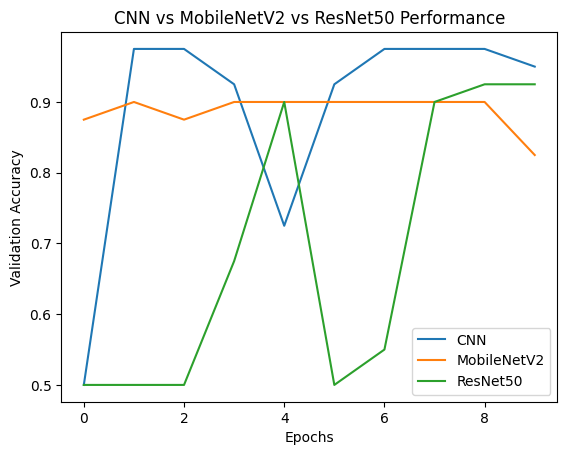

In [ ]:
# compare the three models results

import matplotlib.pyplot as plt

# Plot validation accuracy for all models
plt.plot(history.history['val_accuracy'], label='CNN')
plt.plot(history_mobilenet.history['val_accuracy'], label='MobileNetV2')
plt.plot(history_resnet.history['val_accuracy'], label='ResNet50')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title("CNN vs MobileNetV2 vs ResNet50 Performance")
plt.show()
